Data science project

EDA for University Health Survey Dataset

Women and men are in separated .csv files and treated as separate.

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LinearRegression

#Download the preprosessed data

womenuhs = pd.read_csv('uhswomen.csv')
menuhs = pd.read_csv('uhsmen.csv')

display(womenuhs.head())
display(menuhs.head())

menuhs.columns

,ylterv,unih,riituni,yöheräily,hermostun,masennus,ahdistus,unettom,stressi,liikunta,...,kasviksia,puuroa,jugurtti,karkki,alkoholia,keskustella,läheisiä,kavereita,ikäryhmä,bmi
0,1,7.0,2,1,0,1,1,2,3,3,...,3,1,1,1,4,4,4,4,3,18.818924
1,1,9.0,1,0,1,1,0,1,3,3,...,3,0,3,2,3,2,8,6,3,25.510204
2,2,7.0,3,0,0,0,0,2,2,1,...,4,3,1,3,2,4,5,7,1,20.202020
3,1,8.0,1,0,0,0,0,1,1,2,...,3,3,3,1,0,4,1,14,2,21.048048
4,1,9.0,1,2,0,2,2,2,3,4,...,2,2,3,1,2,4,2,5,2,23.588329


,ylterv,unih,riituni,yöheräily,hermostun,masennus,ahdistus,unettom,stressi,liikunta,...,kasviksia,puuroa,jugurtti,karkki,alkoholia,keskustella,läheisiä,kavereita,ikäryhmä,bmi
0,2,10.0,1,1,2,0,1,1,2,3,...,2,0,3,1,3,4,3,2,2,21.161600
1,1,8.0,3,0,0,0,0,1,1,1,...,1,0,1,1,2,4,5,12,2,23.163373
2,1,7.0,2,0,0,0,0,2,2,3,...,1,0,0,3,5,1,2,3,2,20.657540
3,1,7.0,1,0,0,0,0,1,1,4,...,3,3,3,1,2,4,1,4,3,24.489796
4,1,8.0,2,3,3,3,3,4,4,3,...,2,2,2,1,3,2,1,3,3,22.839506


Index(['ylterv', 'unih', 'riituni', 'yöheräily', 'hermostun', 'masennus',
       'ahdistus', 'unettom', 'stressi', 'liikunta', 'liiktunteina',
       'hyötyliiktunteina', 'kevytliik', 'aamupala', 'lounas', 'päivällinen',
       'miettii_terveel', 'ruisleipää', 'täysjyvää', 'vaaleaaleipää', 'levite',
       'marj/hedel', 'kasviksia', 'puuroa', 'jugurtti', 'karkki', 'alkoholia',
       'keskustella', 'läheisiä', 'kavereita', 'ikäryhmä', 'bmi'],
      dtype='object')

Histograms for both of the datasets

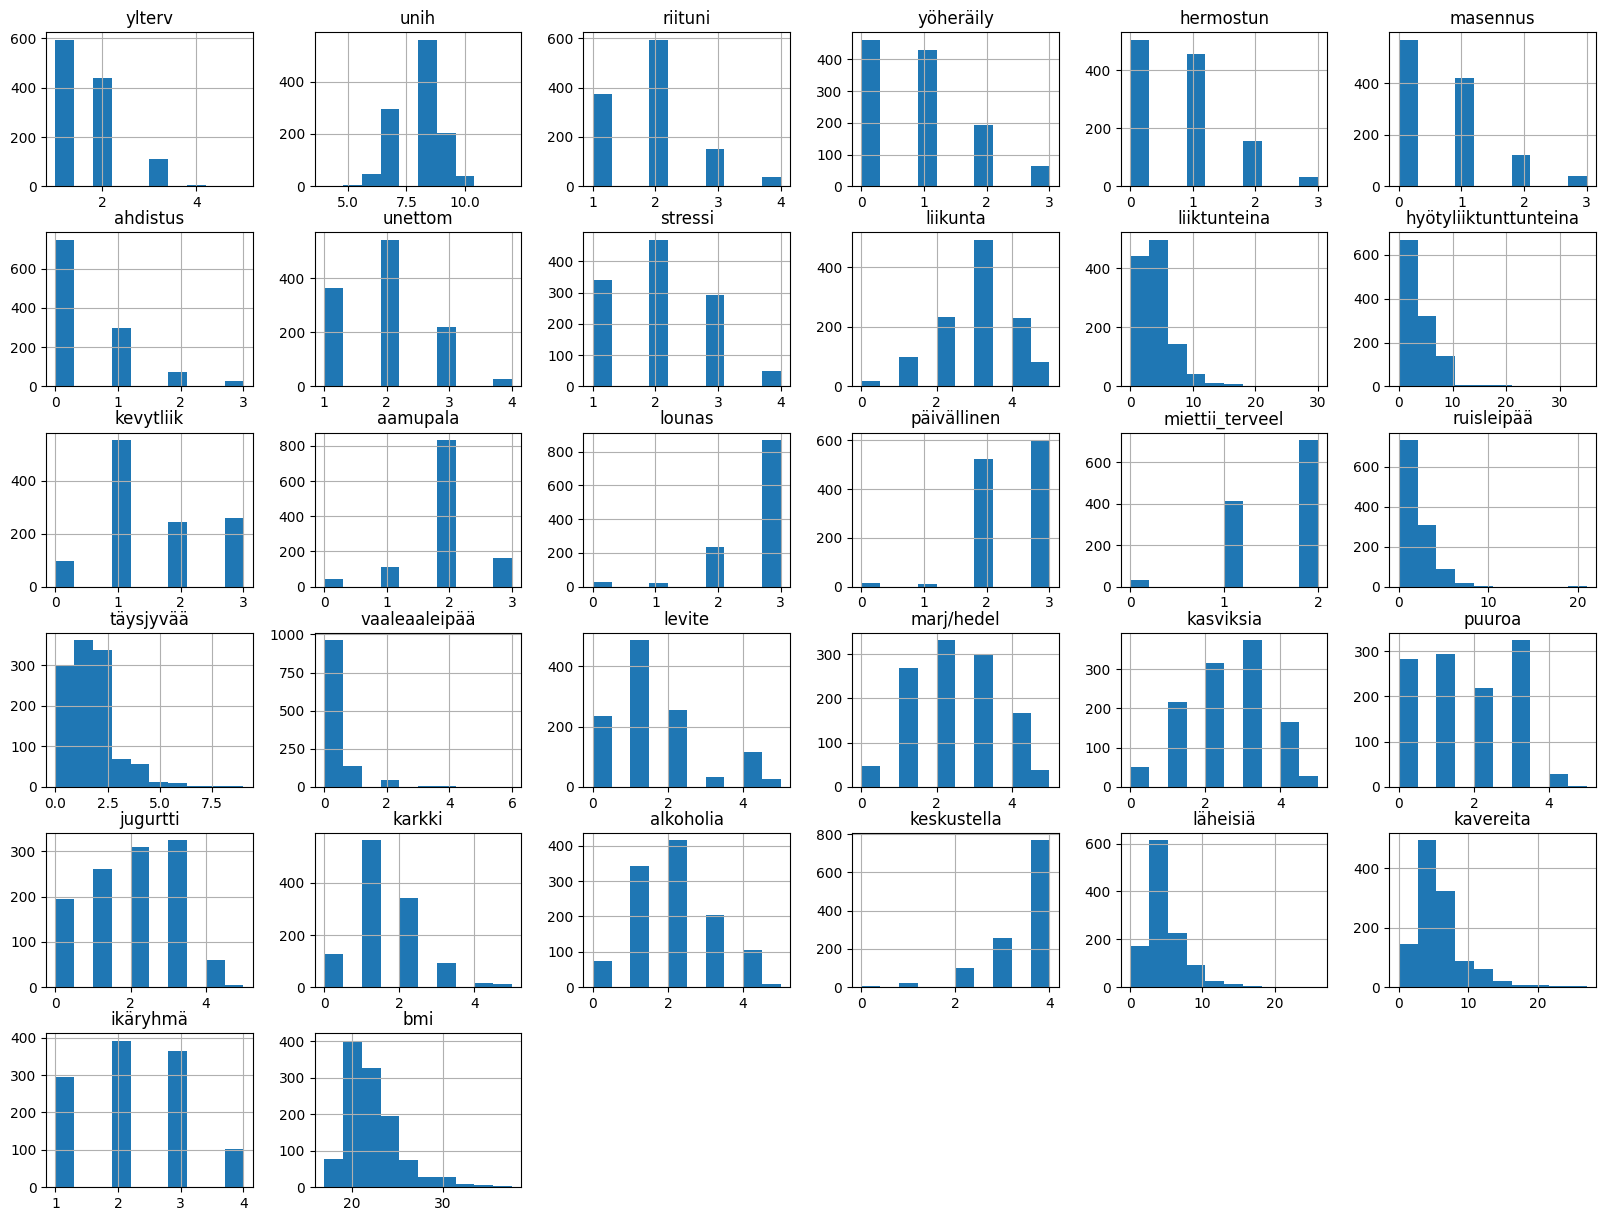

In [2]:
womenuhs.hist(figsize=(20,15))
plt.show()

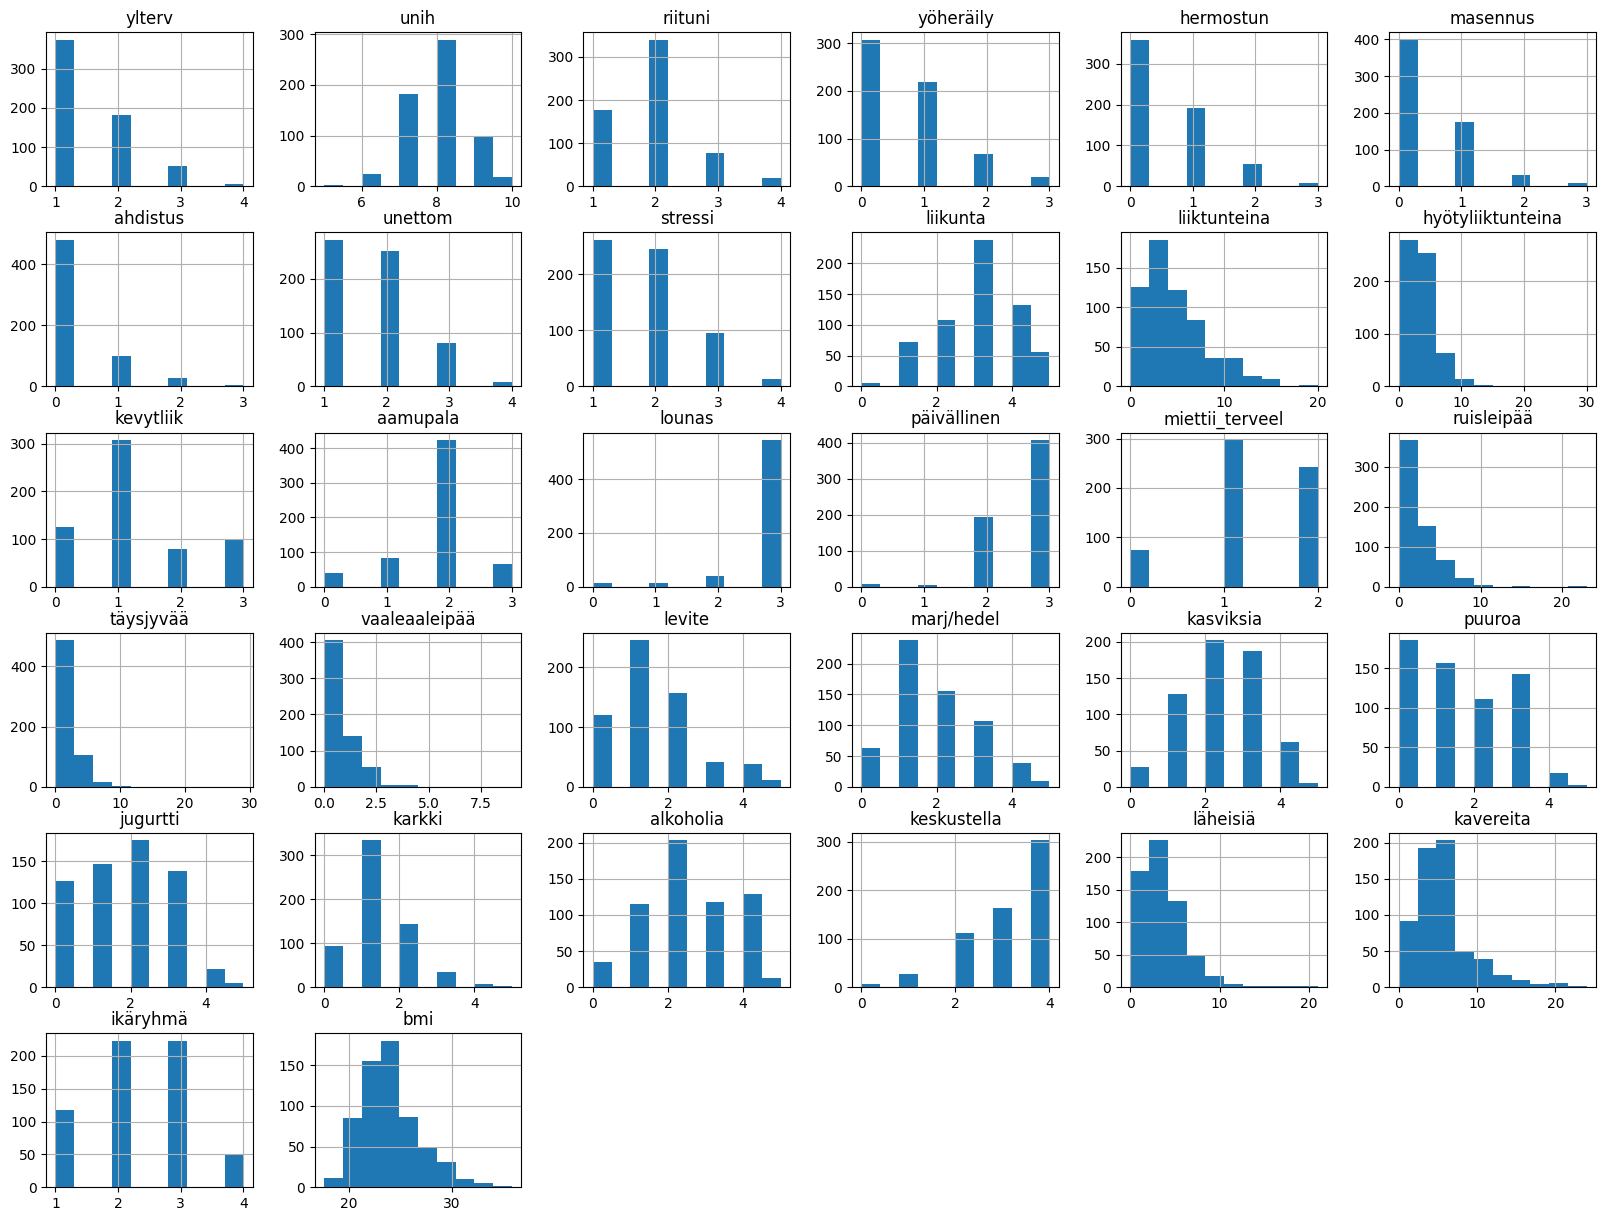

In [3]:
menuhs.hist(figsize=(20,15))
plt.show()

Some overall statistics for women.

In [4]:
womenuhs.describe()

,ylterv,unih,riituni,yöheräily,hermostun,masennus,ahdistus,unettom,stressi,liikunta,...,kasviksia,puuroa,jugurtti,karkki,alkoholia,keskustella,läheisiä,kavereita,ikäryhmä,bmi
count,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,...,1151.000000,1151.000000,1151.000000,1151.00000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000
mean,1.591659,7.889661,1.868810,0.880104,0.754996,0.681147,0.470026,1.926151,2.039965,2.919201,...,2.414422,1.593397,1.833189,1.42311,1.957428,3.526499,4.906169,5.857515,2.234579,22.286971
std,0.687832,0.894907,0.749023,0.884384,0.793949,0.801076,0.733494,0.775002,0.846559,1.076017,...,1.148655,1.216449,1.180999,0.90359,1.083839,0.776246,2.795317,3.644965,0.931882,3.017188
min,1.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,16.979592
25%,1.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,...,2.000000,1.000000,1.000000,1.00000,1.000000,3.000000,3.000000,3.500000,1.000000,20.195335
50%,1.000000,8.000000,2.000000,1.000000,1.000000,1.000000,0.000000,2.000000,2.000000,3.000000,...,2.000000,1.000000,2.000000,1.00000,2.000000,4.000000,4.000000,5.000000,2.000000,21.644121
75%,2.000000,8.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,3.000000,4.000000,...,3.000000,3.000000,3.000000,2.00000,3.000000,4.000000,6.000000,7.000000,3.000000,23.629240
max,5.000000,12.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,5.000000,...,5.000000,5.000000,5.000000,5.00000,5.000000,4.000000,26.000000,27.000000,4.000000,37.552052


Some overall statistics for men.

In [5]:
menuhs.describe()

,ylterv,unih,riituni,yöheräily,hermostun,masennus,ahdistus,unettom,stressi,liikunta,...,kasviksia,puuroa,jugurtti,karkki,alkoholia,keskustella,läheisiä,kavereita,ikäryhmä,bmi
count,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,...,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000
mean,1.491028,7.831974,1.903752,0.675367,0.528548,0.427406,0.275693,1.714519,1.771615,2.959217,...,2.236542,1.438825,1.668842,1.239804,2.375204,3.185971,3.916803,5.544861,2.337684,23.961758
std,0.685042,0.859105,0.731327,0.798690,0.710278,0.654321,0.575093,0.739900,0.783851,1.147589,...,1.065426,1.233357,1.179741,0.836024,1.225880,0.964059,2.514909,3.627243,0.879226,2.791153
min,1.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,17.617725
25%,1.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,...,1.000000,0.000000,1.000000,1.000000,2.000000,3.000000,2.000000,3.000000,2.000000,22.093170
50%,1.000000,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,3.000000,...,2.000000,1.000000,2.000000,1.000000,2.000000,3.000000,3.000000,5.000000,2.000000,23.566632
75%,2.000000,8.000000,2.000000,1.000000,1.000000,1.000000,0.000000,2.000000,2.000000,4.000000,...,3.000000,3.000000,3.000000,2.000000,3.000000,4.000000,5.000000,7.000000,3.000000,25.451114
max,4.000000,10.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,21.000000,24.000000,4.000000,35.834194


Let's take a closer look into sleep distributions in both of the sets. First women.

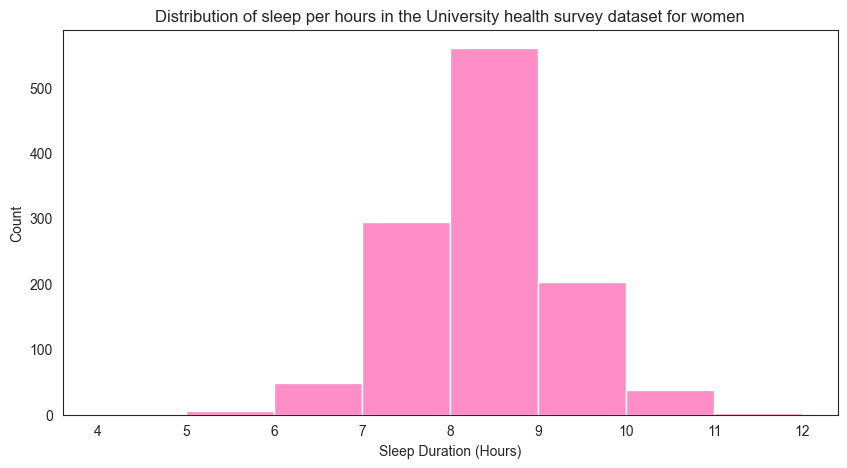

In [9]:
sb.set_style('white')
plt.figure(figsize=(10, 5))
sb.histplot(data=womenuhs, x='unih', bins=8, color='hotpink')
plt.title('Distribution of sleep per hours in the University health survey dataset for women')
plt.xlabel('Sleep Duration (Hours)')
plt.ylabel('Count')
plt.show()

Next men.

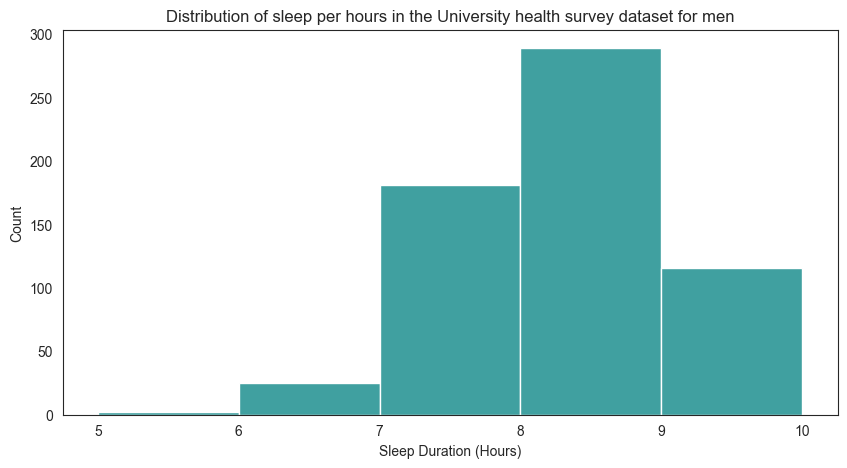

In [19]:
sb.set_style('white')
plt.figure(figsize=(10, 5))
sb.histplot(data=menuhs, x='unih', bins=5, color='teal')
plt.title('Distribution of sleep per hours in the University health survey dataset for men')
plt.xlabel('Sleep Duration (Hours)')
plt.ylabel('Count')
plt.show()

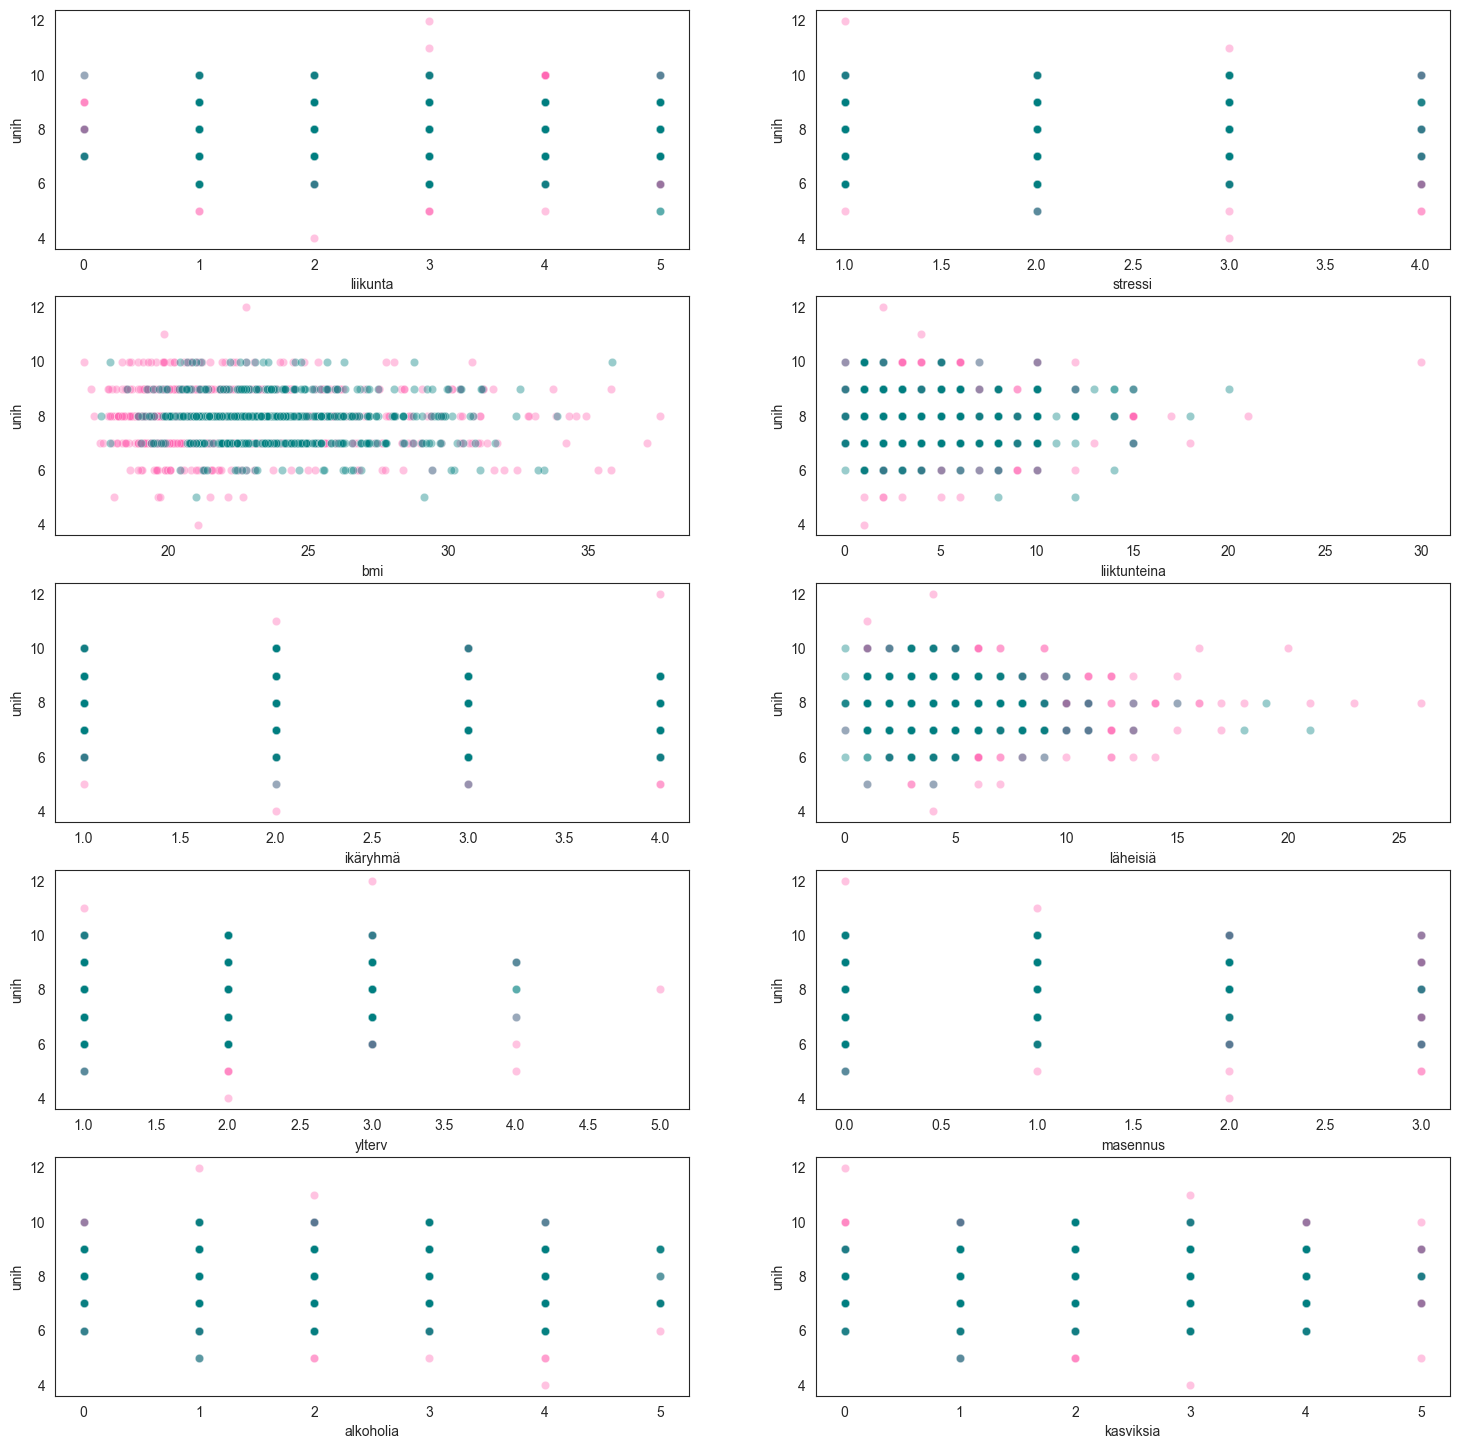

In [22]:
fig, axes = plt.subplots(5, 2, figsize=(18, 18))

sb.scatterplot(ax=axes[0,0], data=womenuhs, y='unih', x ='liikunta',color='hotpink',alpha=0.4)
sb.scatterplot(ax=axes[0,0], data=menuhs, y='unih', x ='liikunta',color='teal',alpha=0.4)

sb.scatterplot(ax=axes[0,1], data=womenuhs, y='unih', x ='stressi',color='hotpink',alpha=0.4)
sb.scatterplot(ax=axes[0,1], data=menuhs, y='unih', x ='stressi',color='teal',alpha=0.4)

sb.scatterplot(ax=axes[1,0], data=womenuhs, y='unih', x ='bmi',color='hotpink',alpha=0.4)
sb.scatterplot(ax=axes[1,0], data=menuhs, y='unih', x ='bmi',color='teal',alpha=0.4)

sb.scatterplot(ax=axes[2,0], data=womenuhs, y='unih', x ='ikäryhmä',color='hotpink',alpha=0.4)
sb.scatterplot(ax=axes[2,0], data=menuhs, y='unih', x ='ikäryhmä',color='teal',alpha=0.4)

sb.scatterplot(ax=axes[1,1], data=womenuhs, y='unih', x ='liiktunteina',color='hotpink',alpha=0.4)
sb.scatterplot(ax=axes[1,1], data=menuhs, y='unih', x ='liiktunteina',color='teal',alpha=0.4)

sb.scatterplot(ax=axes[2,1], data=womenuhs, y='unih', x ='läheisiä',color='hotpink',alpha=0.4)
sb.scatterplot(ax=axes[2,1], data=menuhs, y='unih', x ='läheisiä',color='teal',alpha=0.4)

sb.scatterplot(ax=axes[3,0], data=womenuhs, y='unih', x ='ylterv',color='hotpink',alpha=0.4)
sb.scatterplot(ax=axes[3,0], data=menuhs, y='unih', x ='ylterv',color='teal',alpha=0.4)

sb.scatterplot(ax=axes[3,1], data=womenuhs, y='unih', x ='masennus',color='hotpink',alpha=0.4)
sb.scatterplot(ax=axes[3,1], data=menuhs, y='unih', x ='masennus',color='teal',alpha=0.4)

sb.scatterplot(ax=axes[4,0], data=womenuhs, y='unih', x ='alkoholia',color='hotpink',alpha=0.4)
sb.scatterplot(ax=axes[4,0], data=menuhs, y='unih', x ='alkoholia',color='teal',alpha=0.4)

sb.scatterplot(ax=axes[4,1], data=womenuhs, y='unih', x ='kasviksia',color='hotpink',alpha=0.4)
sb.scatterplot(ax=axes[4,1], data=menuhs, y='unih', x ='kasviksia',color='teal',alpha=0.4)

plt.show()

Let's look into the food parameters more closely

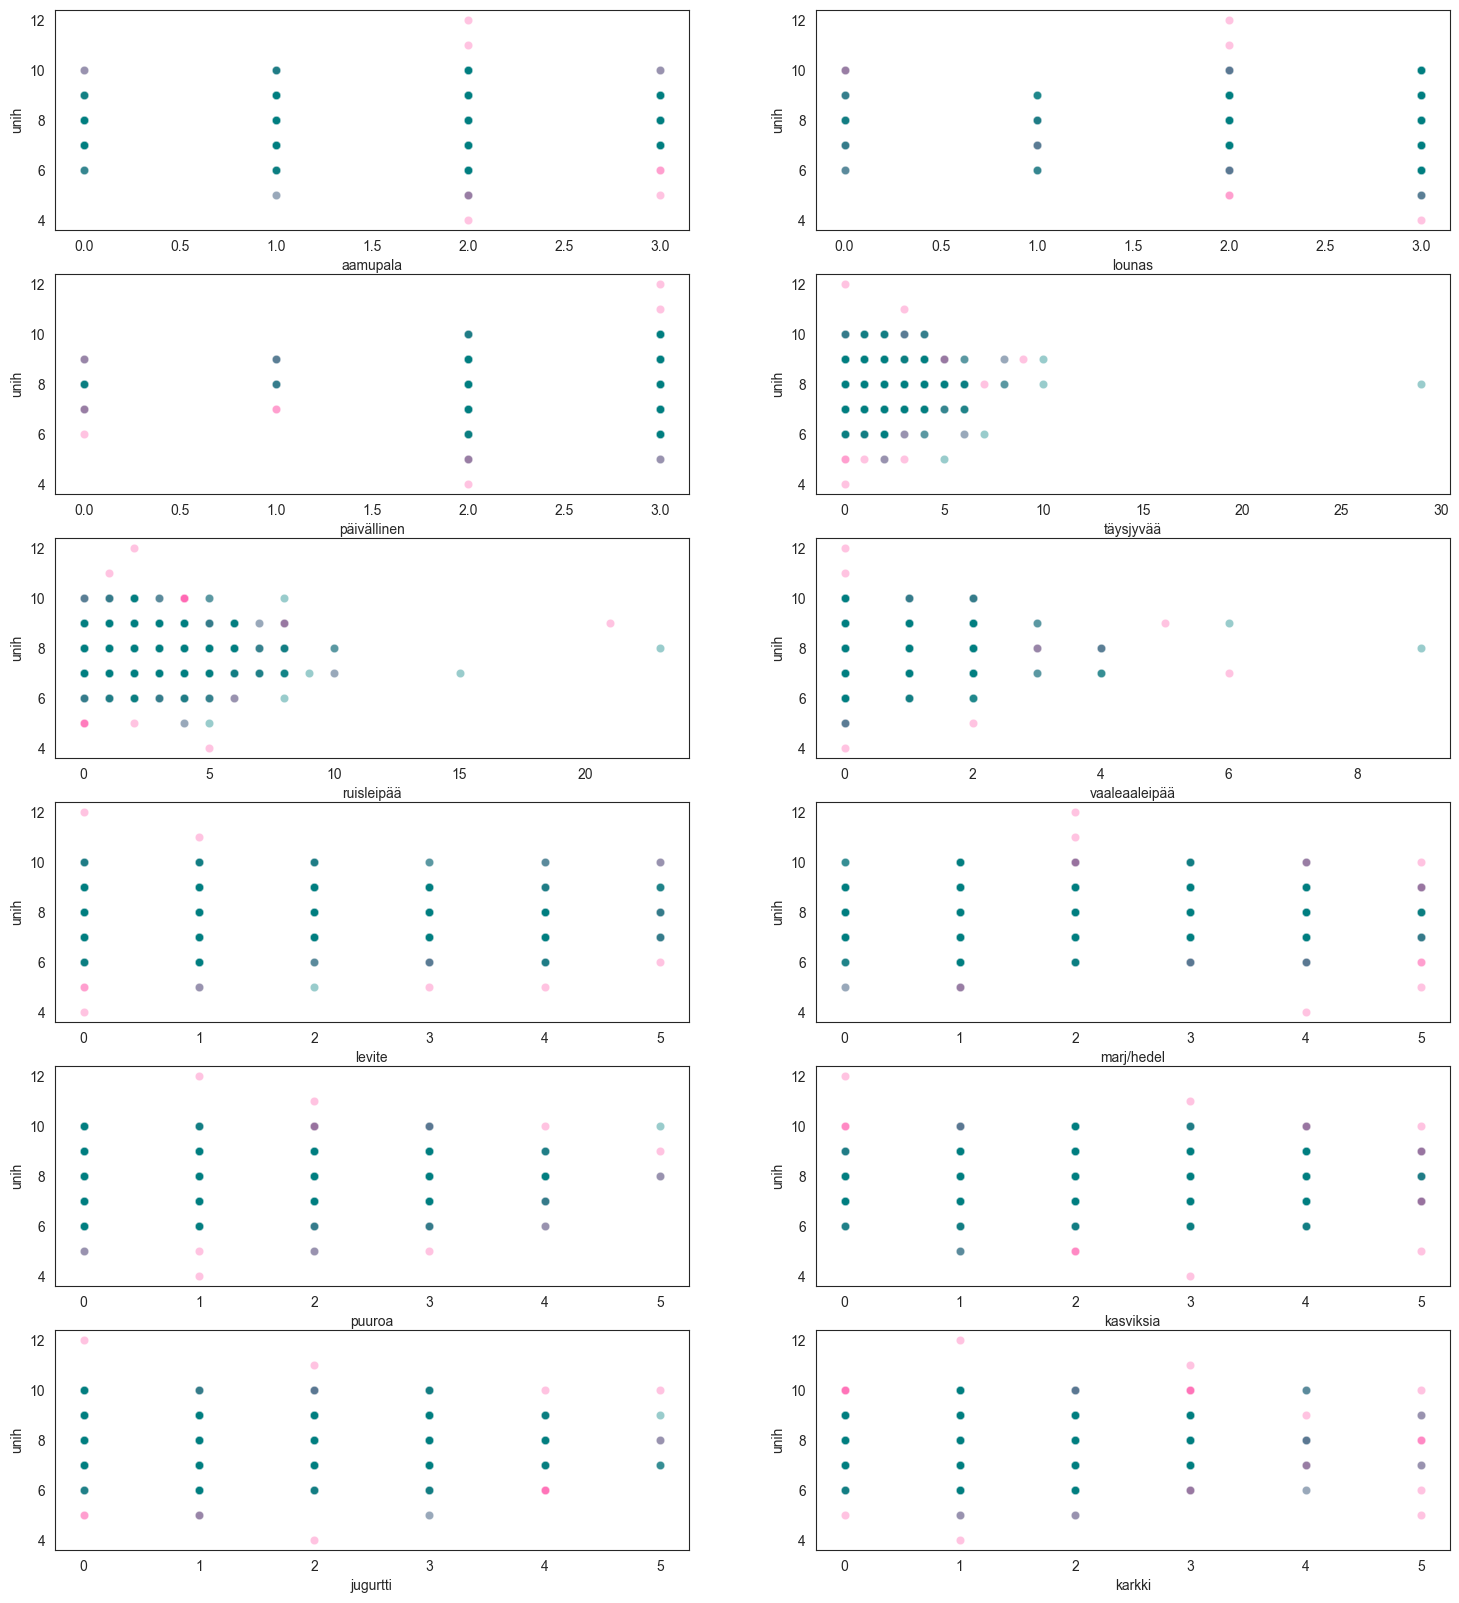

In [26]:
fig, axes = plt.subplots(6, 2, figsize=(18, 20))

sb.scatterplot(ax=axes[0,0], data=womenuhs, y='unih', x ='aamupala',color='hotpink',alpha=0.4)
sb.scatterplot(ax=axes[0,0], data=menuhs, y='unih', x ='aamupala',color='teal',alpha=0.4)

sb.scatterplot(ax=axes[0,1], data=womenuhs, y='unih', x ='lounas',color='hotpink',alpha=0.4)
sb.scatterplot(ax=axes[0,1], data=menuhs, y='unih', x ='lounas',color='teal',alpha=0.4)

sb.scatterplot(ax=axes[1,0], data=womenuhs, y='unih', x ='päivällinen',color='hotpink',alpha=0.4)
sb.scatterplot(ax=axes[1,0], data=menuhs, y='unih', x ='päivällinen',color='teal',alpha=0.4)

sb.scatterplot(ax=axes[2,0], data=womenuhs, y='unih', x ='ruisleipää',color='hotpink',alpha=0.4)
sb.scatterplot(ax=axes[2,0], data=menuhs, y='unih', x ='ruisleipää',color='teal',alpha=0.4)

sb.scatterplot(ax=axes[1,1], data=womenuhs, y='unih', x ='täysjyvää',color='hotpink',alpha=0.4)
sb.scatterplot(ax=axes[1,1], data=menuhs, y='unih', x ='täysjyvää',color='teal',alpha=0.4)

sb.scatterplot(ax=axes[2,1], data=womenuhs, y='unih', x ='vaaleaaleipää',color='hotpink',alpha=0.4)
sb.scatterplot(ax=axes[2,1], data=menuhs, y='unih', x ='vaaleaaleipää',color='teal',alpha=0.4)

sb.scatterplot(ax=axes[3,0], data=womenuhs, y='unih', x ='levite',color='hotpink',alpha=0.4)
sb.scatterplot(ax=axes[3,0], data=menuhs, y='unih', x ='levite',color='teal',alpha=0.4)

sb.scatterplot(ax=axes[3,1], data=womenuhs, y='unih', x ='marj/hedel',color='hotpink',alpha=0.4)
sb.scatterplot(ax=axes[3,1], data=menuhs, y='unih', x ='marj/hedel',color='teal',alpha=0.4)

sb.scatterplot(ax=axes[4,0], data=womenuhs, y='unih', x ='puuroa',color='hotpink',alpha=0.4)
sb.scatterplot(ax=axes[4,0], data=menuhs, y='unih', x ='puuroa',color='teal',alpha=0.4)

sb.scatterplot(ax=axes[4,1], data=womenuhs, y='unih', x ='kasviksia',color='hotpink',alpha=0.4)
sb.scatterplot(ax=axes[4,1], data=menuhs, y='unih', x ='kasviksia',color='teal',alpha=0.4)

sb.scatterplot(ax=axes[5,0], data=womenuhs, y='unih', x ='jugurtti',color='hotpink',alpha=0.4)
sb.scatterplot(ax=axes[5,0], data=menuhs, y='unih', x ='jugurtti',color='teal',alpha=0.4)

sb.scatterplot(ax=axes[5,1], data=womenuhs, y='unih', x ='karkki',color='hotpink',alpha=0.4)
sb.scatterplot(ax=axes[5,1], data=menuhs, y='unih', x ='karkki',color='teal',alpha=0.4)

plt.show()

<Axes: >

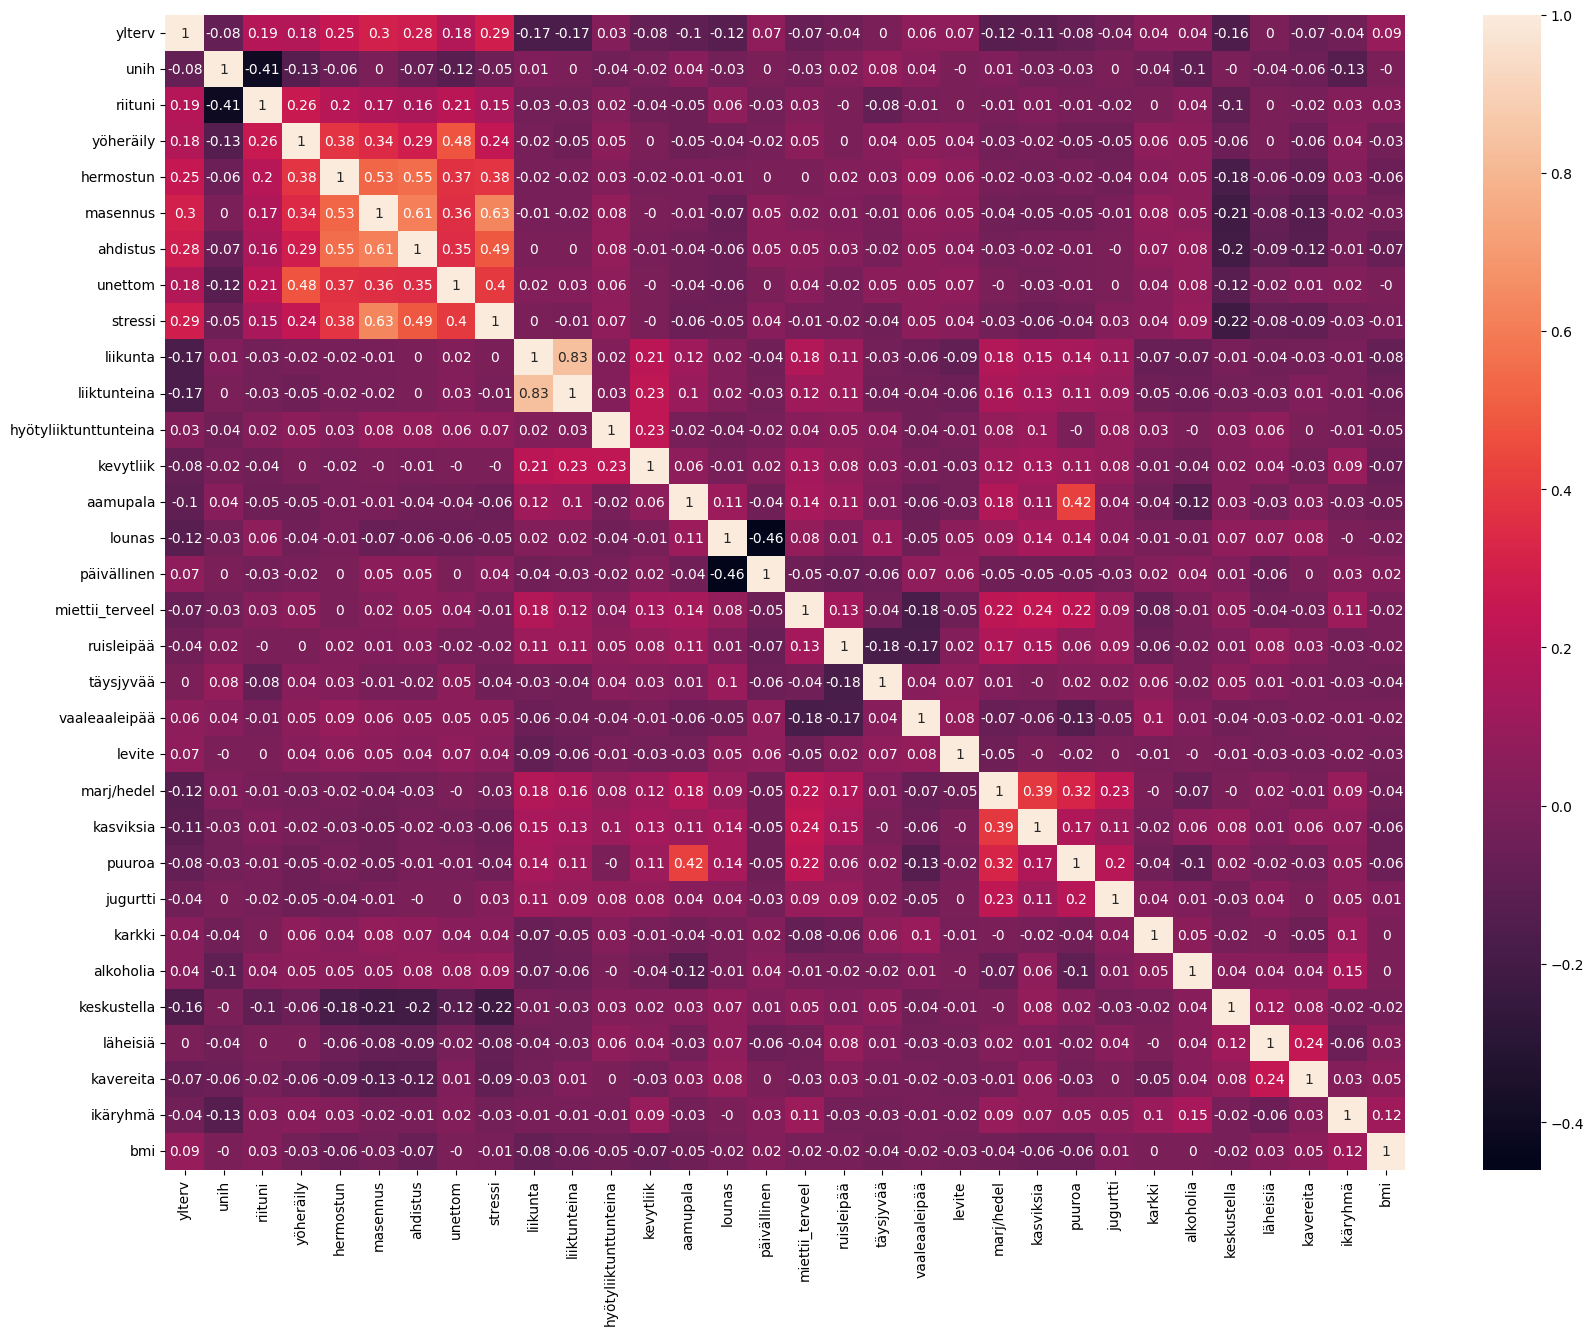

In [5]:
corr = womenuhs.corr(method = 'spearman').round(2)
plt.figure(figsize = (20, 15))
sb.heatmap(corr, annot = True)

<Axes: >

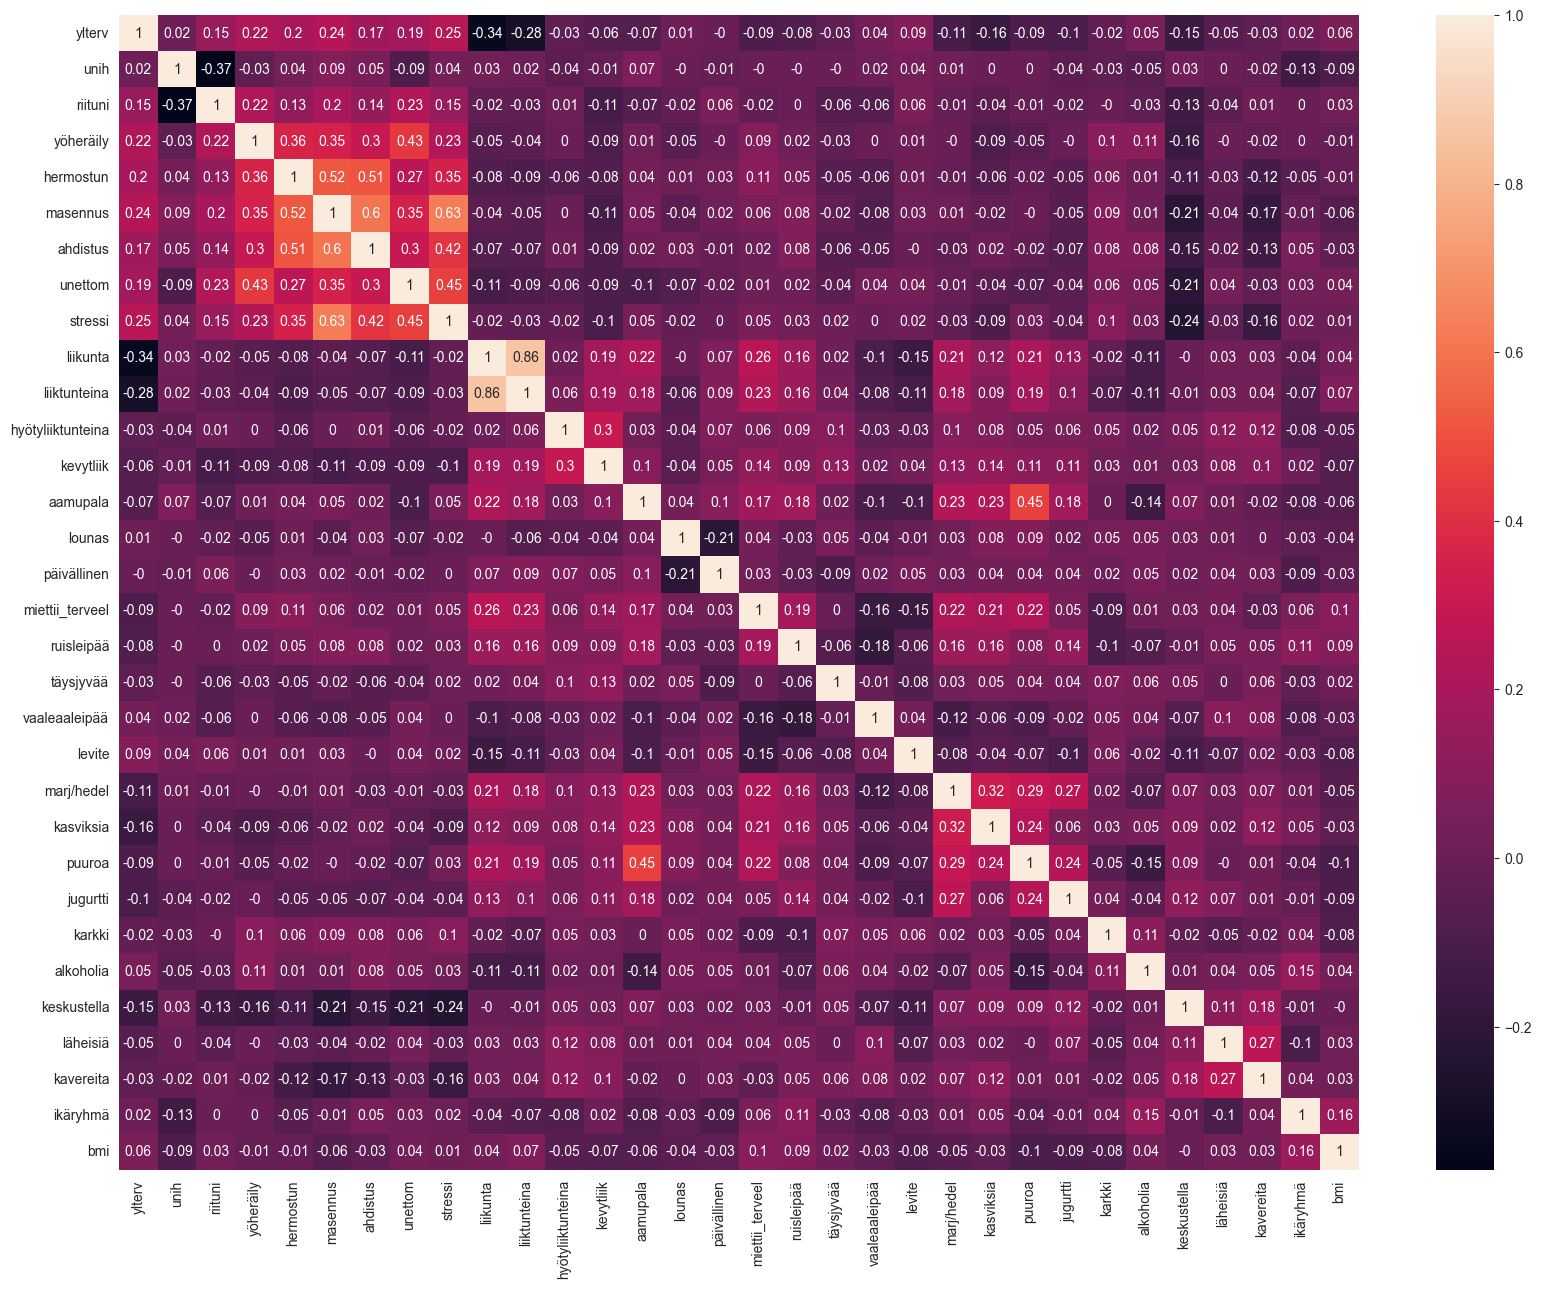

In [29]:
corr = menuhs.corr(method = 'spearman').round(2)
plt.figure(figsize = (20, 15))
sb.heatmap(corr, annot = True)

Linear regression

Let us look how we can fit linear regression to the most interesting cases. We first start with regression between sleep and exercise as hours.

a1:  0.05118408838778472
a2:  0.06517075496229566


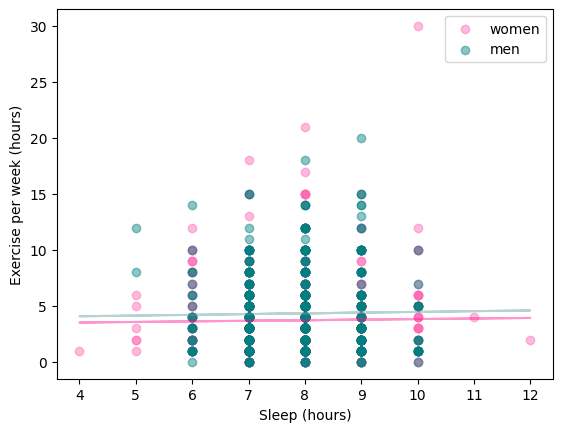

In [56]:
unitunteinan = womenuhs['unih'].to_numpy()
liikuntatunteinan = womenuhs['liiktunteina'].to_numpy()

unitunteinam = menuhs['unih'].to_numpy()
liikuntatunteinam = menuhs['liiktunteina'].to_numpy()

a1, b1 = np.polyfit(unitunteinan, liikuntatunteinan, 1)
a2, b2 = np.polyfit(unitunteinam, liikuntatunteinam, 1)

print("a1: ",a1)
print("a2: ",a2)

plt.scatter(unitunteinan, liikuntatunteinan, color='hotpink',alpha=0.45,label='women')
plt.scatter(unitunteinam, liikuntatunteinam, color='teal',alpha=0.45,label='men')

plt.plot(unitunteinan, a1*unitunteinan+b1,color='deeppink',alpha=0.45)
plt.plot(unitunteinan, a2*unitunteinan+b2,color='cadetblue',alpha=0.45)

plt.xlabel('Sleep (hours)')
plt.ylabel('Exercise per week (hours)')
plt.legend()

plt.show()

Let's do the same but this time we compare exercise to weither or not person feel that they sleep enough.

a1:  -0.22712006717045016
a2:  -0.09491684970190624


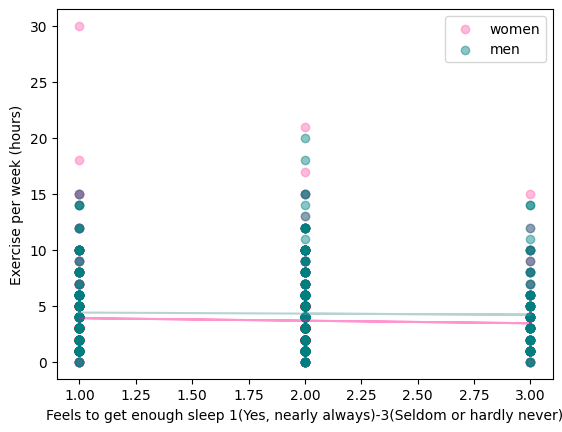

In [55]:
apuw = womenuhs[womenuhs['riituni'] != 4]
apum = menuhs[menuhs['riituni'] != 4]

riittavaunin = apuw['riituni'].to_numpy()
liikuntatunteinan = apuw['liiktunteina'].to_numpy()

riittavaunim = apum['riituni'].to_numpy()
liikuntatunteinam = apum['liiktunteina'].to_numpy()

a1, b1 = np.polyfit(riittavaunin, liikuntatunteinan, 1)
a2, b2 = np.polyfit(riittavaunim, liikuntatunteinam, 1)

print("a1: ",a1)
print("a2: ",a2)

plt.scatter(riittavaunin, liikuntatunteinan, color='hotpink',alpha=0.45,label='women')
plt.scatter(riittavaunim, liikuntatunteinam, color='teal',alpha=0.45,label='men')

plt.plot(riittavaunin, a1*riittavaunin+b1,color='deeppink',alpha=0.45)
plt.plot(riittavaunim, a2*riittavaunim+b2,color='cadetblue',alpha=0.45)

plt.xlabel('Feels to get enough sleep 1(Yes, nearly always)-3(Seldom or hardly never)')
plt.ylabel('Exercise per week (hours)')
plt.legend()

plt.show()

a1:  -0.058550680341414155
a2:  0.056401866458641065


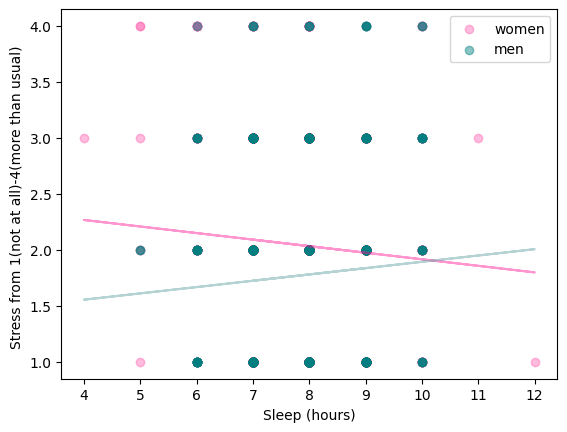

In [52]:
unitunteinan = womenuhs['unih'].to_numpy()
liikuntatunteinan = womenuhs['stressi'].to_numpy()

unitunteinam = menuhs['unih'].to_numpy()
liikuntatunteinam = menuhs['stressi'].to_numpy()

a1, b1 = np.polyfit(unitunteinan, liikuntatunteinan, 1)
a2, b2 = np.polyfit(unitunteinam, liikuntatunteinam, 1)

print("a1: ",a1)
print("a2: ",a2)

plt.scatter(unitunteinan, liikuntatunteinan, color='hotpink',alpha=0.45,label='women')
plt.scatter(unitunteinam, liikuntatunteinam, color='teal',alpha=0.45,label='men')

plt.plot(unitunteinan, a1*unitunteinan+b1,color='deeppink',alpha=0.45)
plt.plot(unitunteinan, a2*unitunteinan+b2,color='cadetblue',alpha=0.45)

plt.xlabel('Sleep (hours)')
plt.ylabel('Stress from 1(not at all)-4(more than usual)')
plt.legend()

plt.show()

a1:  -0.009124989623189054
a2:  -0.018729594637542712


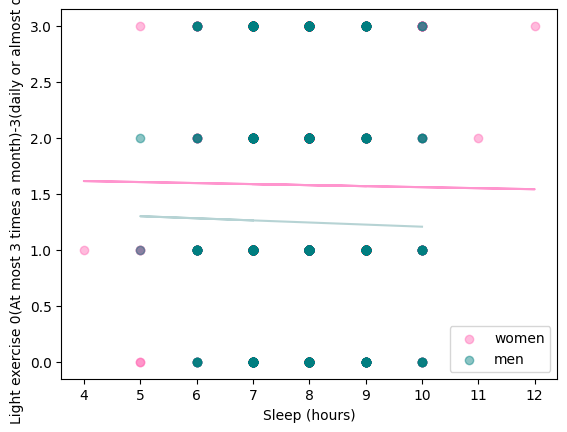

In [53]:
unitunteinan = womenuhs['unih'].to_numpy()
liikuntatunteinan = womenuhs['kevytliik'].to_numpy()

unitunteinam = menuhs['unih'].to_numpy()
liikuntatunteinam = menuhs['kevytliik'].to_numpy()

a1, b1 = np.polyfit(unitunteinan, liikuntatunteinan, 1)
a2, b2 = np.polyfit(unitunteinam, liikuntatunteinam, 1)

print("a1: ",a1)
print("a2: ",a2)

plt.scatter(unitunteinan, liikuntatunteinan, color='hotpink',alpha=0.45,label='women')
plt.scatter(unitunteinam, liikuntatunteinam, color='teal',alpha=0.45,label='men')

plt.plot(unitunteinan, a1*unitunteinan+b1,color='deeppink',alpha=0.45)
plt.plot(unitunteinam, a2*unitunteinam+b2,color='cadetblue',alpha=0.45)

plt.xlabel('Sleep (hours)')
plt.ylabel('Light exercise 0(At most 3 times a month)-3(daily or almost daily)')
plt.legend()

plt.show()

a1:  -0.0495382031905948
a2:  -0.13443820064466272


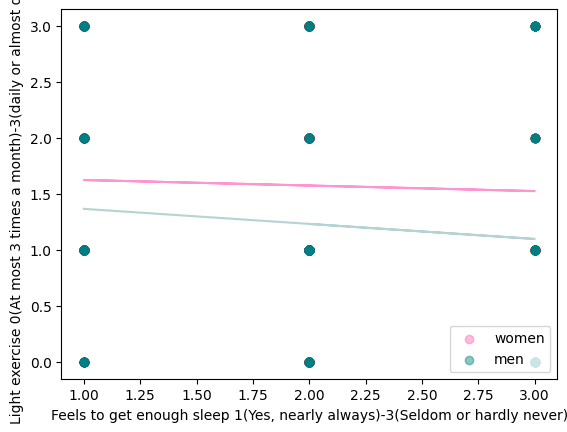

In [54]:
apuw = womenuhs[womenuhs['riituni'] != 4]
apum = menuhs[menuhs['riituni'] != 4]

unitunteinan = apuw['riituni'].to_numpy()
liikuntatunteinan = apuw['kevytliik'].to_numpy()

unitunteinam = apum['riituni'].to_numpy()
liikuntatunteinam = apum['kevytliik'].to_numpy()

a1, b1 = np.polyfit(unitunteinan, liikuntatunteinan, 1)
a2, b2 = np.polyfit(unitunteinam, liikuntatunteinam, 1)

print("a1: ",a1)
print("a2: ",a2)

plt.scatter(unitunteinan, liikuntatunteinan, color='hotpink',alpha=0.45,label='women')
plt.scatter(unitunteinam, liikuntatunteinam, color='teal',alpha=0.45,label='men')

plt.plot(unitunteinan, a1*unitunteinan+b1,color='deeppink',alpha=0.45)
plt.plot(unitunteinam, a2*unitunteinam+b2,color='cadetblue',alpha=0.45)

plt.xlabel('Feels to get enough sleep 1(Yes, nearly always)-3(Seldom or hardly never)')
plt.ylabel('Light exercise 0(At most 3 times a month)-3(daily or almost daily)')
plt.legend()

plt.show()

a1:  0.04324097397145592
a2:  0.15102547280144252


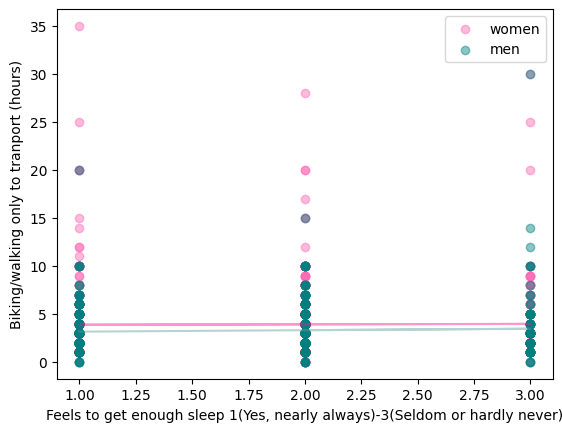

In [50]:
apuw = womenuhs[womenuhs['riituni'] != 4]
apum = menuhs[menuhs['riituni'] != 4]

riittavaunin = apuw['riituni'].to_numpy()
liikuntatunteinan = apuw['hyötyliiktunttunteina'].to_numpy()

riittavaunim = apum['riituni'].to_numpy()
liikuntatunteinam = apum['hyötyliiktunteina'].to_numpy()

a1, b1 = np.polyfit(riittavaunin, liikuntatunteinan, 1)
a2, b2 = np.polyfit(riittavaunim, liikuntatunteinam, 1)

print("a1: ",a1)
print("a2: ",a2)

plt.scatter(riittavaunin, liikuntatunteinan, color='hotpink',alpha=0.45,label='women')
plt.scatter(riittavaunim, liikuntatunteinam, color='teal',alpha=0.45,label='men')

plt.plot(riittavaunin, a1*riittavaunin+b1,color='deeppink',alpha=0.45)
plt.plot(riittavaunim, a2*riittavaunim+b2,color='cadetblue',alpha=0.45)

plt.xlabel('Feels to get enough sleep 1(Yes, nearly always)-3(Seldom or hardly never)')
plt.ylabel('Biking/walking only to tranport (hours)')
plt.legend()

plt.show()

a1:  0.20235096557514862
a2:  0.20000285249736255


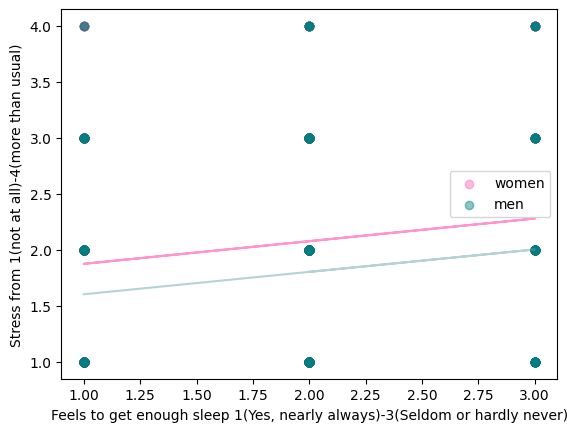

In [58]:
apuw = womenuhs[womenuhs['riituni'] != 4]
apum = menuhs[menuhs['riituni'] != 4]

riittavaunin = apuw['riituni'].to_numpy()
liikuntatunteinan = apuw['stressi'].to_numpy()

riittavaunim = apum['riituni'].to_numpy()
liikuntatunteinam = apum['stressi'].to_numpy()

a1, b1 = np.polyfit(riittavaunin, liikuntatunteinan, 1)
a2, b2 = np.polyfit(riittavaunim, liikuntatunteinam, 1)

print("a1: ",a1)
print("a2: ",a2)

plt.scatter(riittavaunin, liikuntatunteinan, color='hotpink',alpha=0.45,label='women')
plt.scatter(riittavaunim, liikuntatunteinam, color='teal',alpha=0.45,label='men')

plt.plot(riittavaunin, a1*riittavaunin+b1,color='deeppink',alpha=0.45)
plt.plot(riittavaunim, a2*riittavaunim+b2,color='cadetblue',alpha=0.45)

plt.xlabel('Feels to get enough sleep 1(Yes, nearly always)-3(Seldom or hardly never)')
plt.ylabel('Stress from 1(not at all)-4(more than usual)')
plt.legend()

plt.show()

a1:  -0.023929471032745567
a2:  -0.0010982114841530813


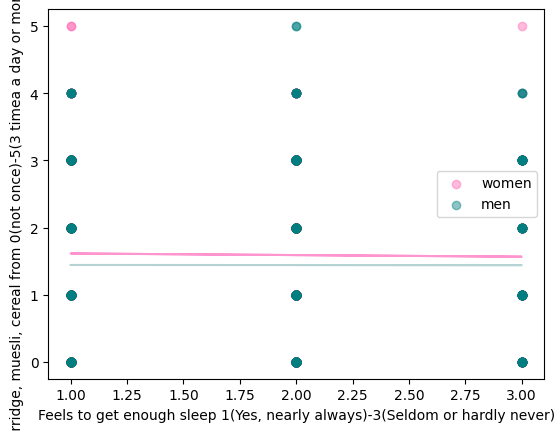

In [61]:
apuw = womenuhs[womenuhs['riituni'] != 4]
apum = menuhs[menuhs['riituni'] != 4]

riittavaunin = apuw['riituni'].to_numpy()
liikuntatunteinan = apuw['puuroa'].to_numpy()

riittavaunim = apum['riituni'].to_numpy()
liikuntatunteinam = apum['puuroa'].to_numpy()

a1, b1 = np.polyfit(riittavaunin, liikuntatunteinan, 1)
a2, b2 = np.polyfit(riittavaunim, liikuntatunteinam, 1)

print("a1: ",a1)
print("a2: ",a2)

plt.scatter(riittavaunin, liikuntatunteinan, color='hotpink',alpha=0.45,label='women')
plt.scatter(riittavaunim, liikuntatunteinam, color='teal',alpha=0.45,label='men')

plt.plot(riittavaunin, a1*riittavaunin+b1,color='deeppink',alpha=0.45)
plt.plot(riittavaunim, a2*riittavaunim+b2,color='cadetblue',alpha=0.45)

plt.xlabel('Feels to get enough sleep 1(Yes, nearly always)-3(Seldom or hardly never)')
plt.ylabel('Porridge, muesli, cereal from 0(not once)-5(3 timea a day or more often)')
plt.legend()

plt.show()

a1:  0.04198152812762597
a2:  -0.012814844396266276


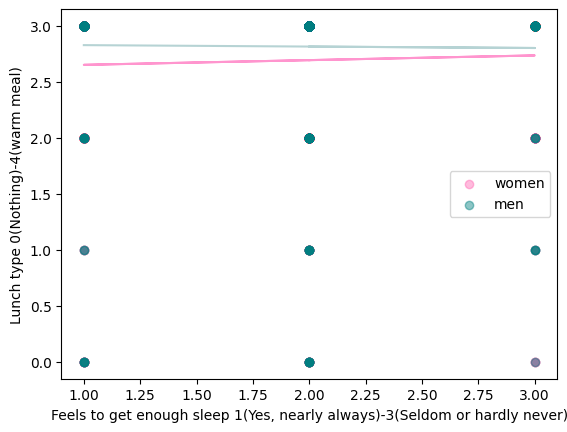

In [62]:
apuw = womenuhs[womenuhs['riituni'] != 4]
apum = menuhs[menuhs['riituni'] != 4]

riittavaunin = apuw['riituni'].to_numpy()
liikuntatunteinan = apuw['lounas'].to_numpy()

riittavaunim = apum['riituni'].to_numpy()
liikuntatunteinam = apum['lounas'].to_numpy()

a1, b1 = np.polyfit(riittavaunin, liikuntatunteinan, 1)
a2, b2 = np.polyfit(riittavaunim, liikuntatunteinam, 1)

print("a1: ",a1)
print("a2: ",a2)

plt.scatter(riittavaunin, liikuntatunteinan, color='hotpink',alpha=0.45,label='women')
plt.scatter(riittavaunim, liikuntatunteinam, color='teal',alpha=0.45,label='men')

plt.plot(riittavaunin, a1*riittavaunin+b1,color='deeppink',alpha=0.45)
plt.plot(riittavaunim, a2*riittavaunim+b2,color='cadetblue',alpha=0.45)

plt.xlabel('Feels to get enough sleep 1(Yes, nearly always)-3(Seldom or hardly never)')
plt.ylabel('Lunch type 0(Nothing)-4(warm meal)')
plt.legend()

plt.show()

In [59]:
model = LinearRegression()

trainunih = womenuhs['unih'][:600].to_numpy().reshape((-1, 1))
trainliikh = womenuhs['liiktunteina'][:600].to_numpy()

testnunih = womenuhs['unih'][600:].to_numpy().reshape((-1, 1))
testliikh = womenuhs['liiktunteina'][600:].to_numpy()

model.fit(trainunih, trainliikh)

predicted = model.predict(testnunih)